# Introduction

Short notebook to get an overview of model performance across architectures and dimensionality. 

In [ ]:
# colab setup:

!git clone https>

In [10]:
# general setup:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from NM_TinyRNN.code.models import parallelised_training as pat
from pathlib import Path
from importlib import reload

In [4]:
# you've trained a bunch of models with:

reload(pat)
#pat.run_training(overwrite=True)

#Here we append the evaluation performance to the model info dataframe

info_df = pat.get_train_info_df()
for model_info in info_df.itertuples():
    model_dir = Path(model_info.save_path)
    eval_json_path = model_dir / f'{model_info.model_id}_info.json'
    if eval_json_path.exists():
        with open(eval_json_path, 'r') as f:
            eval_info = json.load(f)
        info_df.loc[info_df.model_id==model_info.model_id, 'eval_CE'] = eval_info['eval_pred_loss']
        
#open the json and extract eval performance for each model:

<Axes: xlabel='model_type', ylabel='eval_CE'>

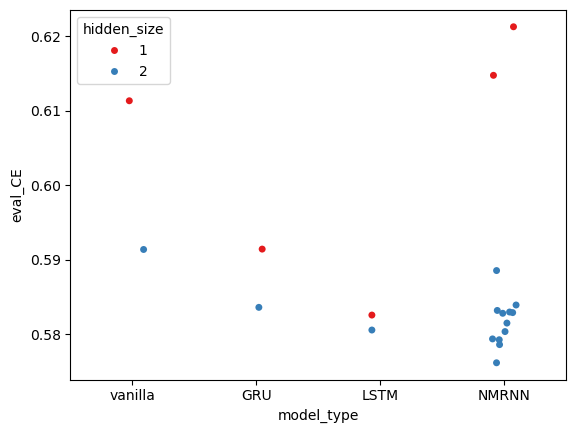

In [5]:
sns.stripplot(
    data=info_df,  
    y='eval_CE', 
    x='model_type',
    hue='hidden_size',
    jitter=True,
    dodge=False, palette='Set1',
)

Index(['sparsity_lambda', 'epoch', 'val_pred_loss', 'train_pred_loss',
       'train_sparsity_loss'],
      dtype='object')


[None, None]

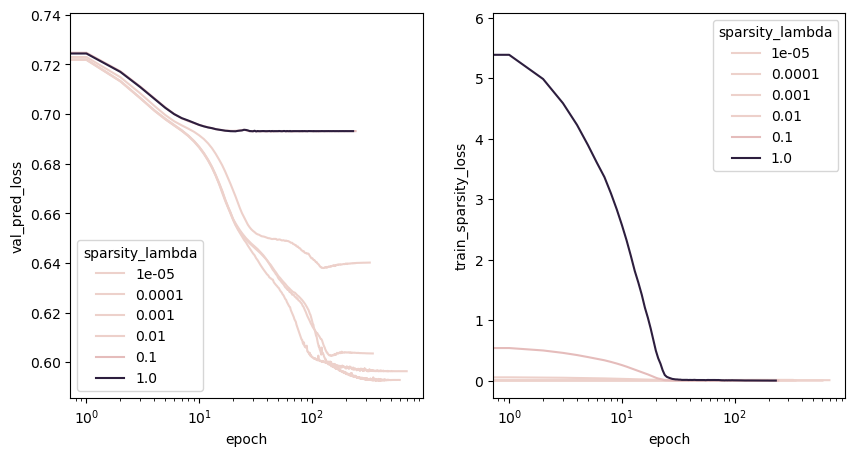

In [17]:
# inspect training losses for an example model (maybe the best one):
example = info_df.iloc[info_df.eval_CE.argmin()]
training_losses_df = pd.read_csv(Path(example.save_path) / f'{example.model_id}_training_losses.htsv', sep='\t')
print(training_losses_df.columns)
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.lineplot(training_losses_df, 
             x= 'epoch', 
             y='val_pred_loss',
             hue='sparsity_lambda', ax = ax[0])
sns.lineplot(training_losses_df, x = 'epoch',y='train_sparsity_loss', 
             hue = 'sparsity_lambda', ax=ax[1])
[x.set_xscale('log') for x in ax]